In [20]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
# Create a copy of relevant columns
data = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
data.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [23]:
# Create a deep copy to avoid warning
data = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Encode Gender safely now
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
data.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [24]:
# Check for null (missing) values
data.isnull().sum()


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

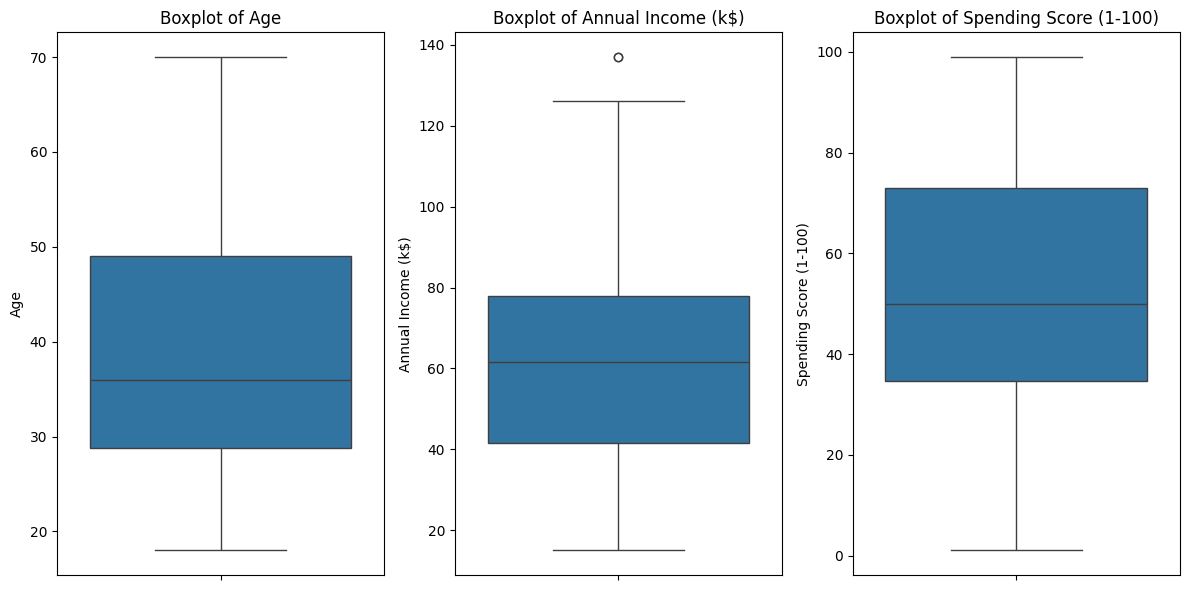

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots to detect outliers
plt.figure(figsize=(12, 6))

for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [26]:
# Make a copy of your preprocessed data to work on
cleaned_data = data.copy()

# List of columns you want to check for outliers
columns_to_check = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Loop through each column and remove outliers using IQR
for column in columns_to_check:
    # Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = cleaned_data[column].quantile(0.25)
    Q3 = cleaned_data[column].quantile(0.75)
    
    # Step 2: Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Step 3: Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Step 4: Keep only the rows within bounds
    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]

# Check how many rows are left after removing outliers
print("Shape before removing outliers:", data.shape)
print("Shape after removing outliers:", cleaned_data.shape)


Shape before removing outliers: (200, 4)
Shape after removing outliers: (198, 4)


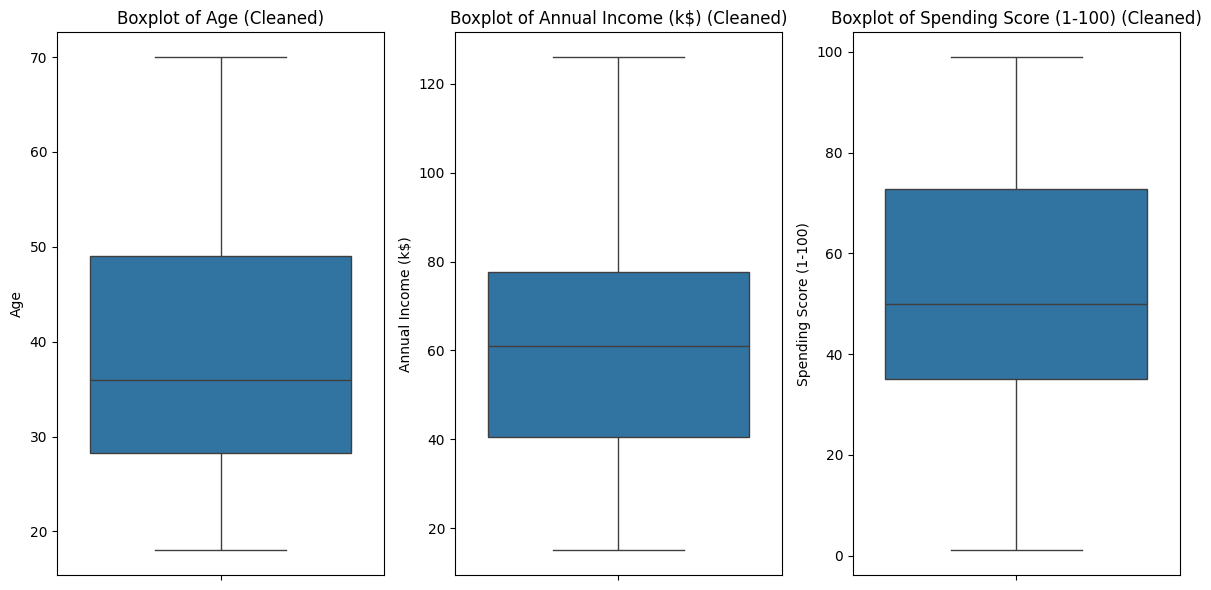

In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bigger figure for better visibility
plt.figure(figsize=(12, 6))

# List of columns you want to plot
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Loop through each column and plot a boxplot
for i in range(len(columns)):
    plt.subplot(1, 3, i + 1)  # Create 3 subplots in one row
    sns.boxplot(y=cleaned_data[columns[i]])  # Plot boxplot for each column
    plt.title(f'Boxplot of {columns[i]} (Cleaned)')  # Add title to each plot

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()



In [28]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns needed for clustering
features = cleaned_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Create the scaler object
scaler = StandardScaler()

# Fit and transform the data (this scales each column)
scaled_features = scaler.fit_transform(features)


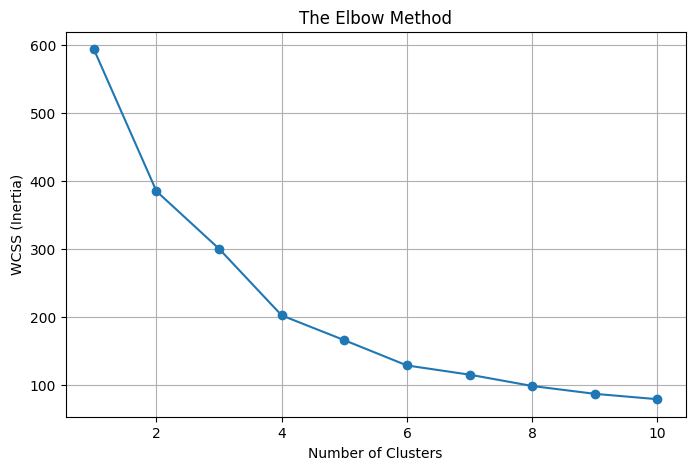

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Store the sum of squared distances for each value of k
wcss = []  # WCSS = Within-Cluster Sum of Squares

# Try cluster numbers from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # .inertia_ gives WCSS

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


In [30]:
# Apply K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit the model and get the cluster labels
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels back to the original cleaned_data
cleaned_data['Cluster'] = clusters


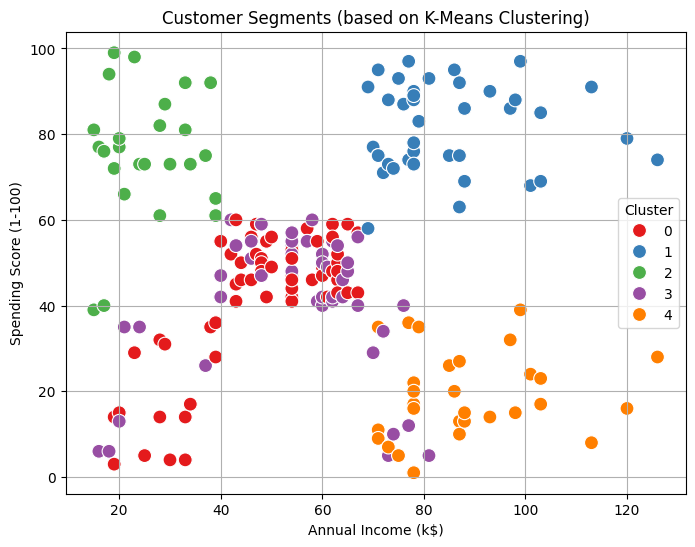

In [31]:
import seaborn as sns

# Create a colored scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=cleaned_data['Annual Income (k$)'],
    y=cleaned_data['Spending Score (1-100)'],
    hue=cleaned_data['Cluster'],
    palette='Set1',
    s=100
)

plt.title('Customer Segments (based on K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
